In [3]:
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
#https://iwatobipen.wordpress.com/2017/01/22/encode-and-decode-smiles-strings/

SMILES_CHARS = [' ',
                  '#', '%', '(', ')', '+', '-', '.', '/',
                  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                  '=', '@',
                  'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                  'R', 'S', 'T', 'V', 'X', 'Z',
                  '[', '\\', ']',
                  'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                  't', 'u',':','d','G','h','W','U','D','y','Y']
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )
def smiles_encoder( smiles, maxlen=1000 ):
    smiles =smiles
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X
 
def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi

In [6]:
#Dataset  https://github.com/topazape/LSTM_Chem

text_file = open("dataset_cleansed.smi", "r")
lines = text_file.read().splitlines()
smiles2=lines

In [5]:
len(valid_mols)

50000

In [6]:
len(smiles2)

50000

In [ ]:
X=np.array([smiles_encoder(i) for i in smiles2[0:50001]])

In [8]:
import keras, keras.layers as L, keras.backend as K

In [9]:
def build_deep_autoencoder(seq_shape, code_size):

    # encoder
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(seq_shape))
    
    encoder.add(L.Conv1D(filters=16, kernel_size=3, activation='elu', padding='same'))
    encoder.add(L.MaxPooling1D())
    encoder.add(L.Conv1D(filters=64, kernel_size=3, activation='elu', padding='same'))
    encoder.add(L.MaxPooling1D())
    encoder.add(L.Conv1D(filters=128, kernel_size=3, activation='elu', padding='same'))
    encoder.add(L.MaxPooling1D())
    encoder.add(L.Conv1D(filters=256, kernel_size=3, activation='elu', padding='same'))
    encoder.add(L.MaxPooling1D())
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))

    # decoder
    decoder = keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    
    decoder.add(L.Dense(1000*65))
    decoder.add(L.Reshape((1000, 65)))
    
    return encoder, decoder

In [10]:
seq_shape=X[0].shape
code_size=2
encoder, decoder = build_deep_autoencoder(seq_shape, code_size=2)
encoder.summary()
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1000, 16)          3136      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 64)           3136      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 250, 128)          24704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 125, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 125, 256)         

In [11]:
encoder, decoder = build_deep_autoencoder(seq_shape, code_size=2)

inp = L.Input(seq_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [16]:
#Fitting for 10 iterations. This hyperparameter can be fine-tuned.
autoencoder.fit(x=X, y=X, epochs=10,verbose=1)

Epoch 1/10
50000/50000 [==============================] - 293s 6ms/step - loss: 6.7545e-04
Epoch 2/10
50000/50000 [==============================] - 289s 6ms/step - loss: 6.7422e-04
Epoch 3/10
50000/50000 [==============================] - 954s 19ms/step - loss: 6.7273e-04
Epoch 4/10
50000/50000 [==============================] - 310s 6ms/step - loss: 6.7187e-04
Epoch 5/10
50000/50000 [==============================] - 325s 7ms/step - loss: 6.7152e-04
Epoch 6/10
50000/50000 [==============================] - 711s 14ms/step - loss: 6.7137e-04
Epoch 7/10
50000/50000 [==============================] - 371s 7ms/step - loss: 6.7131e-04
Epoch 8/10
50000/50000 [==============================] - 382s 8ms/step - loss: 6.7128e-04
Epoch 9/10
50000/50000 [==============================] - 365s 7ms/step - loss: 6.7127e-04
Epoch 10/10
50000/50000 [==============================] - 367s 7ms/step - loss: 6.7125e-04


In [17]:
encoded=encoder.predict(X)

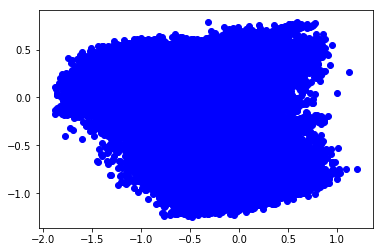

In [18]:
import matplotlib.pyplot as plt
plt.scatter(encoded.T[0], encoded.T[1], color='b')
plt.show()